In [135]:
import matplotlib.pyplot as plt
from scipy import stats
import math
import numpy as np
import sys
import seaborn as sns

def stem(ref):
    return ref.split('/')[-1].split('.')[0]

skani_file_topaz = "/home/jshaw/skani-test/supp_results/learned-c125_skani_topaz.txt"
skanic30_file_topaz = "/home/jshaw/skani-test/supp_results/c30_skani_topaz.txt"
anim_file_topaz = "/home/jshaw/skani-test/supp_results/anim-c30_topaz_euk_skani.txt"
fastani_file_topaz = "/home/jshaw/skani-test/supp_results/fastani-c30_topaz_euk_skani.txt"
sourmash_file_topaz = "/home/jshaw/skani-test/supp_results/sourmash_topaz-a.txt"
sourmash_norm_file_topaz = "/home/jshaw/skani-test/supp_results/sourmash-norm_topaz-a.txt"
mash_file_topaz = "/home/jshaw/skani-test/supp_results/mash_topaz_euk.txt"

skani_file_tara = "/home/jshaw/skani-test/supp_results/learned-c125_skani_tara.txt"
skanic30_file_tara = "/home/jshaw/skani-test/supp_results/c30_skani_tara.txt"
anim_file_tara = "/home/jshaw/skani-test/supp_results/anim-test_euk.txt"
fastani_file_tara = "/home/jshaw/skani-test/supp_results/fastani-test_euk.txt"
sourmash_file_tara = "/home/jshaw/skani-test/supp_results/sourmash_tara-a.txt"
sourmash_norm_file_tara = "/home/jshaw/skani-test/supp_results/sourmash-norm_tara-a.txt"
mash_file_tara = "/home/jshaw/skani-test/supp_results/mash_tara_euk.txt"

skani_file_ocean = "/home/jshaw/skani-test/supp_results/learned-c125_skani_ocean-a.txt"
#skani_file_ocean = "/home/jshaw/skani-test/supp_results/c125_skani_ocean-a.txt"
#skani_file_ocean = "/home/jshaw/skani-test/supp_results/c60_skani_ocean-a.txt"
skanic30_file_ocean = "/home/jshaw/skani-test/supp_results/c30_skani_ocean-a.txt"
anim_file_ocean = "/home/jshaw/skani-test/supp_results/anim-c125_skani_ocean-a.txt"
fastani_file_ocean = "/home/jshaw/skani-test/supp_results/fastani-ocean_c125-a_skani_test_90ANI.txt"
sourmash_file_ocean = "/home/jshaw/skani-test/supp_results/sourmash_ocean-a.txt"
sourmash_norm_file_ocean = "/home/jshaw/skani-test/supp_results/sourmash-norm_ocean-a.txt"
mash_file_ocean = "/home/jshaw/skani-test/supp_results/ocean_a_mash_test.txt"

skani_file_soil = "/home/jshaw/skani-test/supp_results/learned-c125_skani_soil.txt"
skanic30_file_soil = "/home/jshaw/skani-test/supp_results/c30_skani_soil.txt"
anim_file_soil = "/home/jshaw/skani-test/supp_results/anim-soil_skani_triangle_90ANI.txt"
fastani_file_soil = "/home/jshaw/skani-test/supp_results/fastani-soil_skani_triangle_90ANI.txt"
sourmash_file_soil = "/home/jshaw/skani-test/supp_results/sourmash-soil_skani_triangle_90ANI.txt"
sourmash_norm_file_soil = "/home/jshaw/skani-test/supp_results/sourmash-norm--soil_skani_triangle_90ANI.txt"
mash_file_soil = "/home/jshaw/skani-test/supp_results/soil_mash_test.txt"

#skani_file = "/home/jshaw/skani-test/supp_results/learned-elgg_part_2_skani_triangle.txt"
#skanic30_file = "/home/jshaw/skani-test/supp_results/c30_elgg_part_2_skani_triangle.txt"
#anim_file = "/home/jshaw/skani-test/supp_results/anim-elgg_part_2_skani_triangle_90ANI.txt"
#fastani_file = ""
#sourmash_file = ""

#skani_file = "/home/jshaw/skani-test/supp_results/parks_skani_triangle_90ANI.txt"
#skanic30_file = "/home/jshaw/skani-test/supp_results/c30_parks_skani.txt"
#anim_file = "/home/jshaw/skani-test/supp_results/anim-parks_skani_triangle_90ANI.txt"
#fastani_file = ""
#sourmash_file = ""


#skani_file = "/home/jshaw/skani-test/supp_results/sludge_skani_triangle_90ANI.txt"
#skanic30_file = "/home/jshaw/skani-test/supp_results/c30_sludge_skani_triangle.txt"
#anim_file = "/home/jshaw/skani-test/supp_results/anim-sludge_skani_triangle_90ANI.txt"
#fastani_file = ""
#sourmash_file = ""

skani_files =[[skani_file_soil], [skani_file_ocean], [skani_file_tara, skani_file_topaz]]
skanic30_files =[[skanic30_file_soil], [skanic30_file_ocean], [skanic30_file_tara, skanic30_file_topaz]]
anim_files =[[anim_file_soil], [anim_file_ocean], [anim_file_tara, anim_file_topaz]]
fastani_files =[[fastani_file_soil], [fastani_file_ocean], [fastani_file_tara, fastani_file_topaz]]
sourmash_files =[[sourmash_file_soil], [sourmash_file_ocean], [sourmash_file_tara, sourmash_file_topaz]]
sourmash_norm_files =[[sourmash_norm_file_soil], [sourmash_norm_file_ocean], [sourmash_norm_file_tara, sourmash_norm_file_topaz]]
mash_files =[[mash_file_soil], [mash_file_ocean], [mash_file_tara, mash_file_topaz]]


In [137]:
skani_ani_diffs = []
skanic30_ani_diffs = []
fastani_ani_diffs = [] 
sourmash_mc_ani_diffs = [] 
sourmash_ani_diffs = []
mash_ani_diffs = []
skanic30_af_diffs = []
skani_af_diffs = []
fastani_af_diffs = []
anim_anis = []
anim_afs = []
anim_ani_pasolli_lengthfix = []

for set_i in range(len(skani_files)):
    skani_file_g = skani_files[set_i]
    skanic30_file_g = skanic30_files[set_i]
    anim_file_g = anim_files[set_i]
    fastani_file_g = fastani_files[set_i]
    sourmash_file_g = sourmash_files[set_i]
    sourmash_norm_file_g = sourmash_norm_files[set_i]
    mash_file_g = mash_files[set_i]
    
    sourmash_mc_pair_to_ani = dict()
    sourmash_pair_to_ani = dict()
    mash_pair_to_ani = dict()

    skanic30_pair_to_ani = dict()
    skanic30_pair_to_af = dict()

    skani_pair_to_ani = dict()
    skani_pair_to_af = dict()
    skani_pair_to_avg_len = dict()

    anim_pair_to_ani = dict()
    anim_pair_to_af = dict()

    fastani_pair_to_ani = dict()
    fastani_pair_to_af = dict()

    for j in range(len(skani_file_g)):
        skani_file = skani_file_g[j]
        anim_file = anim_file_g[j]
        fastani_file = fastani_file_g[j]
        sourmash_file = sourmash_file_g[j]
        sourmash_norm_file = sourmash_norm_file_g[j]
        mash_file = mash_file_g[j]
        skanic30_file = skanic30_file_g[j]
                
        if mash_file != "":
            for line in open(mash_file,'r'):
                spl = line.split('\t')
                gn1 = stem(spl[0])
                gn2 = stem(spl[1])
                val = float(spl[2])
                mash_pair_to_ani[(gn2,gn1)] = 100 - float(val)*100

        first = True
        c=0
        ind_to_name = dict()
        if sourmash_norm_file != "":
            for line in open(sourmash_norm_file,'r'):
                spl = line.split(',')
                if first:
                    for thing in spl:
                        name = thing.rstrip()
                        ind_to_name[len(ind_to_name)] = stem(name)
                    first = False
                else:
                    for i,val in enumerate(spl):
                        if float(val) > 0:
                            gn1 = ind_to_name[c]
                            gn2 = ind_to_name[i]
                            sourmash_pair_to_ani[(gn1,gn2)] = float(val) * 100
                    c = c + 1


        first = True
        c = 0
        ind_to_name = dict()
        if sourmash_file != "":
            for line in open(sourmash_file,'r'):
                spl = line.split(',')
                if first:
                    for thing in spl:
                        name = thing.rstrip()
                        ind_to_name[len(ind_to_name)] = stem(name)
                    first = False
                else:
                    for i,val in enumerate(spl):
                        if float(val) > 0:
                            gn1 = ind_to_name[c]
                            gn2 = ind_to_name[i]
                            sourmash_mc_pair_to_ani[(gn1,gn2)] = float(val) * 100
                    c = c + 1

        first = True
        for line in open(skanic30_file,'r'):
            if first:
                first = False
                continue
            else:
                spl = line.split('\t')
                ref1 = stem(spl[0])
                ref2 = stem(spl[1])
                skanic30_pair_to_ani[(ref1,ref2)] = float(spl[2])
                skanic30_pair_to_af[(ref1,ref2)] = float(spl[3])

        first = True
        for line in open(skani_file,'r'):
            if first:
                first = False
                continue
            else:
                spl = line.split('\t')
                ref1 = stem(spl[0])
                ref2 = stem(spl[1])
                skani_pair_to_ani[(ref1,ref2)] = float(spl[2])
                skani_pair_to_af[(ref1,ref2)] = float(spl[3])

        for line in open(anim_file,'r'):
            if 'reference' in line:
                continue
            else:
                spl = line.split('\t')
                ref1 = stem(spl[0])
                ref2 = stem(spl[1])
                ani = float(spl[2])
                af = float(spl[4])
                anim_pair_to_ani[(ref1,ref2)] = ani
                anim_pair_to_af[(ref1,ref2)] = af

        if fastani_file != "":
            for line in open(fastani_file,'r'):
                spl = line.split('\t')
                if len(spl) < 5:
                    continue
                ref1 = stem(spl[0])
                ref2 = stem(spl[1])
                ani = float(spl[2])
                af = float(spl[3]) / float(spl[4])
                fastani_pair_to_ani[(ref1,ref2)] = ani
                fastani_pair_to_af[(ref1,ref2)] = 100 * af

    anim_ani = []
    anim_af = []
    skanic30_ani_diff = []
    skanic30_af_diff = []

    skani_ani_diff = []
    skani_af_diff = []

    fastani_ani_diff = []
    fastani_af_diff = []

    sourmash_mc_ani_diff = []
    sourmash_ani_diff = []
    mash_ani_diff = []
    skani_avg_len = []
    
    print(len(skani_pair_to_ani.keys()))
    print(len(skanic30_pair_to_ani.keys()))
    print(len(anim_pair_to_ani.keys()))
    print(len(fastani_pair_to_ani.keys()))
    print(len(sourmash_pair_to_ani.keys()))
    #print(len(sourmash_pair_to_ani.keys()))
    print(len(mash_pair_to_ani.keys()))


    #t = list(skani_pair_to_ani.keys())[0]
    #t1 = list(skanic30_pair_to_ani.keys())[0]
    #print(t,t1)
    not_in_anim = 0
    not_in_fastani = 0
    not_in_mash = 0
    for key in skani_pair_to_ani:
        if key in anim_pair_to_ani and key in skanic30_pair_to_ani and key in mash_pair_to_ani \
        and key in sourmash_mc_pair_to_ani and key in fastani_pair_to_ani:
            ani_anim = anim_pair_to_ani[key]
            af_anim = anim_pair_to_af[key]
            if ani_anim < 90:
                continue
            diffc30_sk_ani = skanic30_pair_to_ani[key] - ani_anim
            diffc30_sk_af = skanic30_pair_to_af[key] - af_anim
            anim_ani.append(ani_anim)
            #if abs(diffc30_sk_ani) > 3:
               # print('ani', key,ani_anim, skanic30_pair_to_ani[key])
            #if diffc30_sk_af > 5:
                #print('af',key,af_anim, skanic30_pair_to_af[key], skanic30_pair_to_ani[key])
            diff_sk_ani = skani_pair_to_ani[key] - ani_anim
            diff_sk_af = skani_pair_to_af[key] - af_anim
            anim_af.append(af_anim)

            skanic30_ani_diff.append(diffc30_sk_ani)
            skanic30_af_diff.append(diffc30_sk_af)
            skani_ani_diff.append(diff_sk_ani)
            skani_af_diff.append(diff_sk_af)
            if fastani_file != "" and key in fastani_pair_to_ani:
                diff_fa_ani = fastani_pair_to_ani[key] - ani_anim
                diff_fa_af = fastani_pair_to_af[key] - af_anim
                fastani_ani_diff.append(diff_fa_ani)
                fastani_af_diff.append(diff_fa_af)
            if sourmash_file != "":
                diff_sourmash_mc_ani = sourmash_mc_pair_to_ani[key] - ani_anim
                sourmash_mc_ani_diff.append(diff_sourmash_mc_ani)
            if sourmash_norm_file != "":
                diff_sourmash_ani = sourmash_pair_to_ani[key] - ani_anim
                sourmash_ani_diff.append(diff_sourmash_ani)
            if mash_file != "" and key in mash_pair_to_ani:
                diff_mash_ani = mash_pair_to_ani[key] - ani_anim
                mash_ani_diff.append(diff_mash_ani)
        else:
            if not (key in anim_pair_to_ani):
                not_in_anim += 1
            if not (key in fastani_pair_to_ani):
                not_in_fastani += 1
            if not (key in mash_pair_to_ani):
                not_in_mash += 1

    print(not_in_anim, not_in_fastani, not_in_mash)
    skani_ani_diffs.append(skani_ani_diff)
    skanic30_ani_diffs.append(skanic30_ani_diff)
    fastani_ani_diffs.append(fastani_ani_diff)
    mash_ani_diffs.append(mash_ani_diff)
    sourmash_mc_ani_diffs.append(sourmash_mc_ani_diff)
    sourmash_ani_diffs.append(sourmash_ani_diff)
    skani_af_diffs.append(skani_af_diff)
    skanic30_af_diffs.append(skanic30_af_diff)
    fastani_af_diffs.append(fastani_af_diff)
    anim_anis.append(anim_ani)
    anim_afs.append(anim_af)

#checkm and gstawk are used for computing contamination, incompletion, and N50
checkm = "../precomputed_results/25-50-checkm.txt"
second = "../precomputed_results/25-50-gstawk.txt"
import glob
import utils

#species bin folders for Pasolli et al. (2019)
sgb_folders = ["../precomputed_results/"]
genome_dict = dict()

plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'font.family':'arial'})
cm = 1/2.54  # centimeters in inches
downsample = 1

#Use sourmash max-contain instead of mash
anim_sourmash = False

gridsize=15

vmax = 98.5
vmin =  96.5
mincnt = 20

#Parse big checkm log. 
for line in open(checkm, 'r'):
    if line[0] == '-' or "Contamination" in line or line[0] == '[' or len(line.strip()) == 0:
        continue
    spl = line.split()
    spl_g = spl[0].split('/')[-1]
    genome = spl_g + '.fa'
    completeness = 100 - float(spl[-3])
    contam = float(spl[-2])
    genome_dict[genome] = [completeness,contam]

#Parse gstawk n50s. 
for line in open(second, 'r'):
    if 'assembly' in line:
        continue
    spl = line.split('\t')
    spl_g = spl[0].split('/')[-1]
    if 'gstawk' in second:
        genome = spl_g
        N50 = int(spl[-2])
        if genome in genome_dict:
            genome_dict[genome].append(N50)
    else:
        genome = spl_g + '.fa'
        contam_portion  = float(spl[-2])
        if genome in genome_dict:
            genome_dict[genome].append(contam_portion)

dist_mat_skani = dict()
dist_mat_skani_clf = dict()
dist_mat_fastani = dict()
dist_mat_mash = dict()
dist_mat_anim = dict()
dist_mat_sourmash = dict()
dist_mat_sour_norm = dict()

low = 90
high = 100

alignment_files_anim = []
alignment_mats_skani = []
alignment_mats_skanic30 = []
alignment_files_fastani = []
anim_ani_files = []


for folder in sgb_folders:
    #results are distances matrices in the files
    #anim_[ID], skani_[ID], fastani_[ID], mash_[ID]  
    base = "../precomputed_results//25-50/"
    anim_folders = glob.glob(folder + "/25-50/anim_*")
    for anim_folder in anim_folders:
        num = anim_folder.split('_')[-1]
        anim_res = anim_folder + "/ANIm_percentage_identity.tab"
        skani_res = folder + "/25-50/skani_" + num
        skani_res_clf = folder + "/25-50/c30skani_" + num
        fastani_res = folder + "/25-50/fastani_" + num + ".matrix"
        mash_res = folder + "/25-50/mash_" + num
        sourmash_res_norm = folder + "/25-50/sour-normal_" + num
        sourmash_res = folder + "/25-50/sour_" + num
        
        
        anim_file_al = anim_folder + '/ANIm_alignment_coverage.tab'
        skani_file_al = base + 'skani_' + num +'.af'
        skani_filec30_al = base + 'c30skani_' + num +'.af'
        fastani_file_al = base + 'fastani-list_' + num 
        
        alignment_files_anim.append(anim_file_al)
        alignment_mats_skani.append(skani_file_al)
        alignment_mats_skanic30.append(skani_filec30_al)
        alignment_files_fastani.append(fastani_file_al)
        anim_ani_files.append(anim_folder + '/ANIm_percentage_identity.tab')

        anim_mat = utils.parse_matrix(anim_res)
        skani_mat = utils.parse_matrix(skani_res)
        skani_clf_mat = utils.parse_matrix(skani_res_clf)
        fastani_mat = utils.parse_matrix(fastani_res)
        mash_mat = utils.parse_matrix(mash_res)
        sourmash_mat = utils.parse_matrix(sourmash_res)
        sour_norm_mat = utils.parse_matrix(sourmash_res_norm)

        for (ref1,ref2) in anim_mat:
            key = (ref1,ref2)
            rkey = (ref2,ref1)
            n50_1 = genome_dict[ref1][-1]
            n50_2 = genome_dict[ref2][-1]
            if n50_1 < n50_2:
                n50_x = np.log(n50_1)
                n50_y = np.log(n50_2)
            else:
                n50_x = np.log(n50_2)
                n50_y = np.log(n50_1)
            if anim_mat[key] > low and anim_mat[key] < high:
                dist_mat_anim[key] = anim_mat[key]
                if key in skani_mat and key in skani_clf_mat:
                    x = skani_mat[key]
                    x_clf = skani_clf_mat[key]
                    dist_mat_skani_clf[key] = x_clf
                    dist_mat_skani[key] = x
                elif rkey in skani_mat and rkey in skani_clf_mat:
                    x = skani_mat[rkey]
                    x_clf = skani_clf_mat[rkey]
                    dist_mat_skani_clf[key] = x_clf
                    dist_mat_skani[key] = x
                if key in fastani_mat:
                    dist_mat_fastani[key] = fastani_mat[key]
                elif rkey in fastani_mat:
                    dist_mat_fastani[key] = fastani_mat[rkey]
                if key in mash_mat:
                    dist_mat_mash[key] = mash_mat[key]
                elif rkey in mash_mat:
                    dist_mat_mash[key] = mash_mat[rkey]
                if key in sourmash_mat:
                    dist_mat_sourmash[key] = sourmash_mat[key]
                    dist_mat_sour_norm[key] = sour_norm_mat[key]
                elif rkey in sourmash_mat:
                    dist_mat_sourmash[key] = sourmash_mat[rkey]
                    dist_mat_sour_norm[key] = sour_norm_mat[rkey]


skani = []
skani_c30 = []
fastani = []
mash = [] 
sour = []
sour_norm = [] 

for key in dist_mat_anim:
    anim = dist_mat_anim[key]
    if key not in dist_mat_skani:
        print(key)
        continue
    if (dist_mat_fastani[key] < 50 or dist_mat_skani[key] < 50):
        continue
    anim_ani_pasolli_lengthfix.append(anim)
    skani.append(dist_mat_skani[key] - anim)
    skani_c30.append(dist_mat_skani_clf[key] - anim)
    sour.append(dist_mat_sourmash[key] - anim)
    fastani.append(dist_mat_fastani[key] - anim)
    mash.append(dist_mat_mash[key] - anim)
    sour_norm.append(dist_mat_sour_norm[key] - anim)

skani_ani_diffs.append(skani)
skanic30_ani_diffs.append(skani_c30)
fastani_ani_diffs.append(fastani)
mash_ani_diffs.append(mash)
sourmash_mc_ani_diffs.append(sour)
sourmash_ani_diffs.append(sour_norm)

anim_pair_to_af = dict()
anim_pair_to_ani = dict()
skani_pair_to_af = dict()
c30_skani_pair_to_af = dict()
fastani_pair_to_af = dict()

for fastani_file in alignment_files_fastani:
    for line in open(fastani_file,'r'):
        spl = line.split('\t')
        gn1 = spl[0].split('/')[-1].rstrip()[0:-3]
        gn2 = spl[1].split('/')[-1].rstrip()[0:-3]
        f1 = float(spl[-2])
        f2 = float(spl[-1])
        fastani_pair_to_af[(gn1,gn2)] = f1/f2
                
for anim_file in alignment_files_anim:
    genome_to_ind = dict()
    ind_to_genome = dict()
    first = True
    for line in open(anim_file,'r'):
        spl = line.split('\t')
        if first:
            for genome in spl[1:]:
                ind_to_genome[len(genome_to_ind)] = genome.rstrip()
                genome_to_ind[genome] = len(genome_to_ind)
            first = False
        else:
            for i in range(1,len(spl)):
                val = float(spl[i])
                genome_i = spl[0]
                genome_j = ind_to_genome[i-1]
                #print(genome_i,genome_j,val)
                anim_pair_to_af[(genome_i,genome_j)] = val          
for anim_file in anim_ani_files:
    genome_to_ind = dict()
    ind_to_genome = dict()
    first = True
    for line in open(anim_file,'r'):
        spl = line.split('\t')
        if first:
            for genome in spl[1:]:
                ind_to_genome[len(genome_to_ind)] = genome.rstrip()
                genome_to_ind[genome] = len(genome_to_ind)
            first = False
        else:
            for i in range(1,len(spl)):
                val = float(spl[i])
                genome_i = spl[0]
                genome_j = ind_to_genome[i-1]
                #print(genome_i,genome_j,val)
                anim_pair_to_ani[(genome_i,genome_j)] = val 
                
for skani_file in alignment_mats_skani:
    ind_to_genome = dict()
    first = True
    j = 0
    ind_dist_dict = dict()
    for line in open(skani_file,'r'):
        spl = line.split('\t')
        if first:
            first = False
        else:
            gn = spl[0].split('/')[-1].rstrip()[0:-3]
            ind_to_genome[len(ind_to_genome)] = gn
            for i in range(1,len(spl)):
                ind_dist_dict[(i-1,j-1)] = float(spl[i])
        j += 1
    for (key,val) in ind_dist_dict.items():
        gn_key = (ind_to_genome[key[1]],ind_to_genome[key[0]])
        skani_pair_to_af[gn_key] = val 
        
for skani_file in alignment_mats_skanic30:
    ind_to_genome = dict()
    first = True
    j = 0
    ind_dist_dict = dict()
    for line in open(skani_file,'r'):
        spl = line.split('\t')
        if first:
            first = False
        else:
            gn = spl[0].split('/')[-1].rstrip()[0:-3]
            ind_to_genome[len(ind_to_genome)] = gn
            for i in range(1,len(spl)):
                ind_dist_dict[(i-1,j-1)] = float(spl[i])
        j += 1
    for (key,val) in ind_dist_dict.items():
        gn_key = (ind_to_genome[key[1]],ind_to_genome[key[0]])
        c30_skani_pair_to_af[gn_key] = val 
    
skani_af_diff = []
fastani_af_diff = []
skanic30_af_diff = []
anim_ani = []
anim_af_v = []
for key in fastani_pair_to_af:
    if key in skani_pair_to_af and key in c30_skani_pair_to_af and key in anim_pair_to_ani:
        skani_af = skani_pair_to_af[key]
        skanic30_af = c30_skani_pair_to_af[key]
        fastani_af = fastani_pair_to_af[key] * 100
        anim_af = anim_pair_to_af[key] * 100
        skani_af_diff.append(skani_af - anim_af)
        skanic30_af_diff.append(skanic30_af - anim_af)
        fastani_af_diff.append(fastani_af-anim_af)
        anim = anim_pair_to_ani[key] * 100
        anim_ani.append(anim)
        anim_af_v.append(anim_af)
        
skani_af_diffs.append(skani_af_diff)
fastani_af_diffs.append(fastani_af_diff)
skanic30_af_diffs.append(skanic30_af_diff)
anim_anis.append(anim_ani)
anim_afs.append(anim_af_v)

15806
52527
10088
9187
440369
25859
5718 6619 6
134391
227790
134812
71979
2279699
169804
0 62442 379
3396
4180
4189
7518
416173
719923
0 54 0


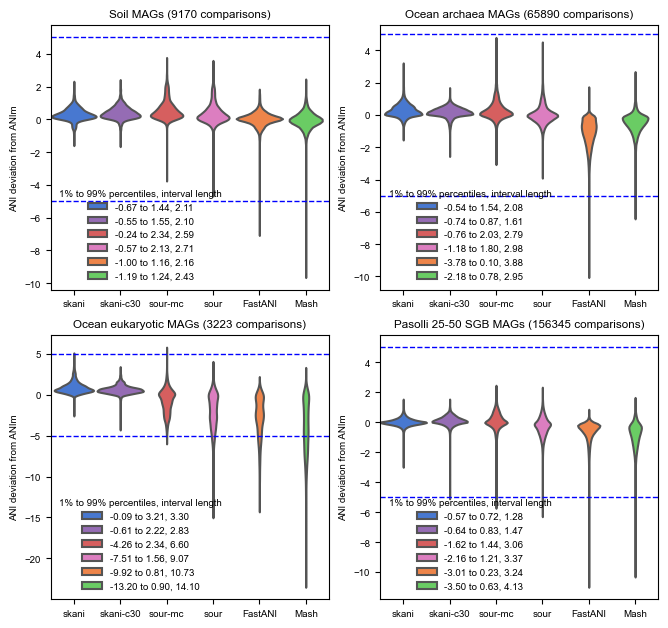

In [139]:
import pandas as pd
import statistics

cm = 1/2.54  # centimeters in inches
plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'font.family':'arial'})
fig = plt.figure(figsize=(17*cm, 16*cm))
cmap = sns.color_palette("muted")
titles = ['Soil MAGs', 'Ocean archaea MAGs', 'Ocean eukaryotic MAGs', 'Pasolli 25-50 SGB MAGs']
for i in range(len(skani_ani_diffs)):
    skani_ani_diff = skani_ani_diffs[i]
    skanic30_ani_diff = skanic30_ani_diffs[i]
    fastani_ani_diff = fastani_ani_diffs[i]
    sourmash_mc_ani_diff = sourmash_mc_ani_diffs[i]
    sourmash_ani_diff = sourmash_ani_diffs[i]
    mash_ani_diff = mash_ani_diffs[i]
    arrays = [skani_ani_diff, skanic30_ani_diff,  sourmash_mc_ani_diff, sourmash_ani_diff,fastani_ani_diff, mash_ani_diff]
    quants = []
    for ar in arrays:
        quants.append(f"{np.percentile(ar,1):.2f} to {np.percentile(ar,99):.2f}, {(np.percentile(ar,99) - np.percentile(ar,1)):.2f}")
    colors = [cmap[0], cmap[4], cmap[3], cmap[6], cmap[1], cmap[2]]
    labels = ['skani' for x in range(len(skani_ani_diff))] +\
    ['skani-c30' for x in range(len(skanic30_ani_diff))] +\
    ['sour-mc' for x in range(len(skani_ani_diff))] +\
    ['sour' for x in range(len(skani_ani_diff))] +\
    ['FastANI' for x in range(len(skani_ani_diff))]  +\
    ['Mash' for x in range(len(skani_ani_diff))] 
    df = pd.DataFrame(data = {"ANI deviation from ANIm": skani_ani_diff + \
                          skanic30_ani_diff + \
                          sourmash_mc_ani_diff + \
                          sourmash_ani_diff + \
                          fastani_ani_diff + \
                          mash_ani_diff, 'Method':labels})
    plt.subplot(2, 2, i+1)
    vp = sns.violinplot(df, y="ANI deviation from ANIm", x = 'Method',palette = colors, 
                    width = 1.,cut=2,saturation=1, inner=None)
    vp.legend([x for x in quants], frameon=False,title='1% to 99% percentiles, interval length',  loc = 'lower left')
    #vp.legend(handles=vp.legend_.legendHandles, labels=['test','test','test','test','test','test'])
    vp.set(xlabel=None)
#     if i != 3 and i != 1:
#         vp.set(xticklabels=[])
    title = titles[i] + f" ({len(skani_ani_diff)} comparisons)"
    plt.title(title)
    #plt.axhline(y=0.0, color='black', linestyle='-',linewidth=1)
    plt.axhline(y=5.0, color='b', linestyle='--',linewidth=1)
    plt.axhline(y=-5.0, color='b', linestyle='--',linewidth=1)

plt.tight_layout()
plt.savefig("../final_figures/four-panel-ANI-violin.svg")

In [ ]:
    #plt.plot(anim_ani, fastani_af_diff, 'o', alpha = 0.02, color = cmap[1])
    #plt.axhline(y=0.0, color='black', linestyle='-',linewidth=1)
    #plt.axhline(y=10.0, color='b', linestyle='--',linewidth=1)
    #plt.axhline(y=-10.0, color='b', linestyle='--',linewidth=1)
    #plt.ylim([-40,20])

(-2.6265564589768076, -22.089335996684802, -0.42509346640319734)
(-7.849713012774899, -48.835834976223104, -0.31396250327070163)
(-2.5814261105645, -18.115757663076202, -0.19379302736451987)
(-2.08590078160195, -10.93711406249352, -0.07957852957852651)


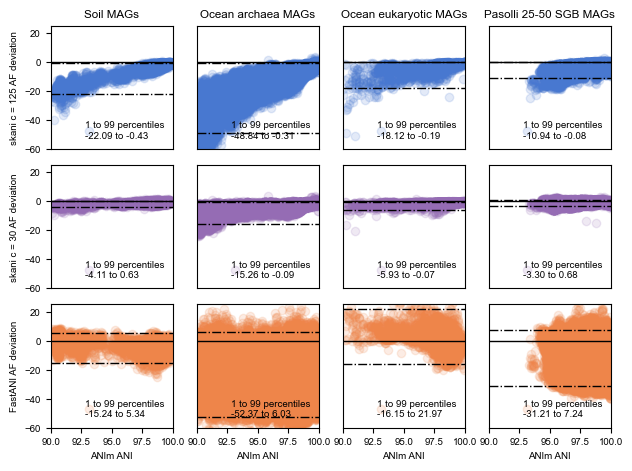

In [145]:
import pandas as pd
import scipy.stats
import statistics
import copy
def percentile_confidence_interval(data, percentile = 99):
    cl = copy.deepcopy(data)
    cl.sort()
    l = len(data)
    return cl[l//2], cl[int(l*(100-percentile)/100)] , cl[int(l * percentile/100)]

cm = 1/2.54  # centimeters in inches
cmap = sns.color_palette("muted")
plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'font.family':'arial'})
fig = plt.figure(figsize=(16*cm, 12*cm))
cmap = sns.color_palette("muted")
af_cor = False
alph = 0.15
titles = ['Soil MAGs', 'Ocean archaea MAGs', 'Ocean eukaryotic MAGs', 'Pasolli 25-50 SGB MAGs']
for i in range(len(skani_af_diffs)):
    anim_ani = anim_anis[i]
    anim_af = anim_afs[i]

    skani_af_diff = skani_af_diffs[i]
    skanic30_af_diff = skanic30_af_diffs[i]
    fastani_af_diff = fastani_af_diffs[i]
    
    skani_af = np.array(skani_af_diff) + np.array(anim_af)
    fastani_af = np.array(fastani_af_diff) + np.array(anim_af)
    skani_c30_af = np.array(skanic30_af_diff) + np.array(anim_af)

    ci_sk = percentile_confidence_interval(skani_af_diff)
    print(ci_sk)
    ci_c30 = percentile_confidence_interval(skanic30_af_diff)
    ci_fastani = percentile_confidence_interval(fastani_af_diff)
    plt.subplot(3,4,i+1)
    c125_lr = stats.linregress(np.array(anim_af), np.array(skani_af))
    fastani_lr = stats.linregress(np.array(anim_af), np.array(fastani_af))
    c30_lr = stats.linregress(np.array(anim_af), np.array(skani_c30_af))
    color = 'black'
    
    ylims = [-60,25]
    if not af_cor:
        label = label = f'1 to 99 percentiles\n{ci_sk[1]:.2f} to {ci_sk[2]:.2f}'
        plt.plot(anim_ani, skani_af_diff, 'o', alpha = alph, color = cmap[0],label = label)
        plt.axhline(y=0.0, color='black', linestyle='-',linewidth=1)
        #plt.axhline(y=ci_sk[0], color=color, linestyle='--',linewidth=1)
        plt.axhline(y=ci_sk[1], color=color, linestyle='-.',linewidth=1)
        plt.legend(frameon=False, loc = 'lower right',handletextpad=-0.5, handlelength=0)
        plt.axhline(y=ci_sk[2], color=color, linestyle='-.',linewidth=1)
        plt.ylim(ylims)
        plt.xlim([90,100])
        if i == 0:
            plt.ylabel("skani c = 125 AF deviation")
    else:
        label = label = f'skani, c = 125\ny = {c125_lr.slope:.3f}x + {c125_lr.intercept:.3f}\nPearson R = {c125_lr.rvalue:.3f}'
        plt.plot(anim_af, np.array(skani_af_diff) + np.array(anim_af), 'o', alpha = alph, color = cmap[0], label=label)
        plt.plot(range(0,100), range(0,100), c = 'black', linestyle = '-', linewidth = 1)
        plt.legend(frameon=False, loc = 'upper left',handletextpad=-0.5, handlelength=0)
        #plt.plot(range(10,100), range(0,90), c = color, linestyle = '--', linewidth = 1)
        #plt.plot(range(0,90), range(10,100), c = color, linestyle = '--', linewidth = 1)
        plt.ylim([0,100])
        plt.xlim([0,100])
        if i == 0:
            plt.ylabel("skani c = 125 aligned fraction")
    plt.xticks(ticks=[])
    if i != 0:
        plt.yticks(ticks=[])
    plt.title(titles[i])



    plt.subplot(3,4,i+5)
    if not af_cor:
        label = label = f'1 to 99 percentiles\n{ci_c30[1]:.2f} to {ci_c30[2]:.2f}'
        plt.plot(anim_ani, skanic30_af_diff, 'o', alpha = alph, color = cmap[4],label=label)
        plt.axhline(y=0.0, color='black', linestyle='-',linewidth=1)
        plt.axhline(y=ci_c30[1], color=color, linestyle='-.',linewidth=1)
        plt.axhline(y=ci_c30[2], color=color, linestyle='-.',linewidth=1)
        plt.legend(frameon=False, loc = 'lower right',handletextpad=-0.5, handlelength=0)
        #plt.axhline(y=10.0, color=color, linestyle='--',linewidth=1)
        #plt.axhline(y=-10.0, color=color, linestyle='--',linewidth=1)
        plt.ylim(ylims)
        plt.xlim([90,100])

        if i == 0:
            plt.ylabel("skani c = 30 AF deviation")
    else:
        label = label = f'skani, c = 30\ny = {c30_lr.slope:.3f}x + {c30_lr.intercept:.3f}\nPearson R = {c30_lr.rvalue:.3f}'
        plt.plot(anim_af, np.array(skanic30_af_diff) + np.array(anim_af), 'o', alpha = alph, color = cmap[4], label = label)
        plt.plot(range(0,100), range(0,100), c = 'black', linestyle = '-', linewidth = 1)
        #plt.plot(range(10,100), range(0,90), c = color, linestyle = '--', linewidth = 1)
        #plt.plot(range(0,90), range(10,100), c = color, linestyle = '--', linewidth = 1)
        plt.ylim([0,100])
        plt.xlim([0,100])
        plt.legend(frameon=False, loc = 'upper left',handletextpad=-0.5, handlelength=0)
        if i == 0:
            plt.ylabel("skani c = 30 aligned fraction")
    plt.xticks(ticks=[])
    if i != 0:
        plt.yticks(ticks=[])

        
    plt.subplot(3,4,9 + i )
    if not af_cor:
        label = label = f'1 to 99 percentiles\n{ci_fastani[1]:.2f} to {ci_fastani[2]:.2f}'
        plt.plot(anim_ani, fastani_af_diff, 'o', alpha = alph, color = cmap[1],label=label)
        plt.axhline(y=0.0, color='black', linestyle='-',linewidth=1)
        plt.axhline(y=ci_fastani[1], color=color, linestyle='-.',linewidth=1)
        plt.legend(frameon=False, loc = 'lower right',handletextpad=-0.5, handlelength=0)
        plt.axhline(y=ci_fastani[2], color=color, linestyle='-.',linewidth=1)
        plt.ylim(ylims)
        plt.xlabel("ANIm ANI")
        plt.xlim([90,100])

        if i == 0:
            plt.ylabel("FastANI AF deviation")
    else:
        label = label = f'FastANI\ny = {fastani_lr.slope:.3f}x + {fastani_lr.intercept:.3f}\nPearson R = {fastani_lr.rvalue:.3f}'
        plt.plot(anim_af, np.array(fastani_af_diff) + np.array(anim_af), 'o', alpha = alph, color = cmap[1],label = label)
        plt.plot(range(0,100), range(0,100), c = 'black', linestyle = '-', linewidth = 1)
        #plt.plot(range(10,100), range(0,90), c = color, linestyle = '--', linewidth = 1)
        #plt.plot(range(0,90), range(10,100), c = color, linestyle = '--', linewidth = 1)
        plt.ylim([0,100])
        plt.xlim([0,100])
        plt.legend(frameon=False, loc = 'upper left',handletextpad=-0.5, handlelength=0)
        plt.xlabel("ANIm aligned fraction")
        if i == 0:
            plt.ylabel("FastANI aligned fraction")

    if i != 0:
        plt.yticks(ticks=[])
plt.tight_layout()
if af_cor:
    plt.savefig("../final_figures/AF-correlation-linear.png", dpi = 300,bbox_inches='tight',pad_inches=0,)
else:
    plt.savefig("../final_figures/AF-deviation-vs-ANIm.png", dpi = 300,bbox_inches='tight',pad_inches=0,)
    #plt.boxplot([skani_af_diff, skanic60_af_diff, fastani_af_diff], whis = [1.0,99.0])

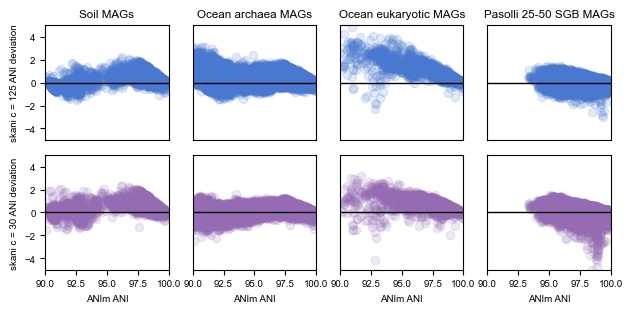

In [147]:
import pandas as pd
import scipy.stats
import statistics
import copy
def percentile_confidence_interval(data, percentile = 99):
    cl = copy.deepcopy(data)
    cl.sort()
    l = len(data)
    return cl[l//2], cl[int(l*(100-percentile)/100)] , cl[int(l * percentile/100)]

cm = 1/2.54  # centimeters in inches
cmap = sns.color_palette("muted")
plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'font.family':'arial'})
fig = plt.figure(figsize=(16*cm, 8*cm))
cmap = sns.color_palette("muted")
titles = ['Soil MAGs', 'Ocean archaea MAGs', 'Ocean eukaryotic MAGs', 'Pasolli 25-50 SGB MAGs']
for i in range(len(skani_ani_diffs)):
    if i != 3:
        anim_ani = anim_anis[i]
    else:
        anim_ani = anim_ani_pasolli_lengthfix
    anim_af = anim_afs[i]
    fastani_ani_diff = fastani_ani_diffs[i]
    mash_ani_diff = mash_ani_diffs[i]
    sourmash_ani_diff = sourmash_ani_diffs[i]

    skani_ani_diff = skani_ani_diffs[i]
    skanic30_ani_diff = skanic30_ani_diffs[i]

    plt.subplot(2,4,i+1)
    
    ylims = [-5,5]
    plt.plot(anim_ani, skani_ani_diff, 'o', alpha = 0.15, color = cmap[0])
    #plt.plot(anim_ani, mash_ani_diff, 'o', alpha = 0.02, color = cmap[0])
    plt.axhline(y=0.0, color='black', linestyle='-',linewidth=1)
    #plt.axhline(y=ci_sk[0], color=color, linestyle='--',linewidth=1)
    #plt.axhline(y=ci_sk[1], color=color, linestyle='-.',linewidth=1)
    #plt.axhline(y=ci_sk[2], color=color, linestyle='-.',linewidth=1)
    plt.xlim([90,100])
    plt.ylim(ylims)
    if i == 0:
        plt.ylabel("skani c = 125 ANI deviation")
    plt.xticks(ticks=[])
    if i != 0:
        plt.yticks(ticks=[])
    plt.title(titles[i])



    plt.subplot(2,4,i+5)
    plt.plot(anim_ani, skanic30_ani_diff, 'o', alpha = 0.15, color = cmap[4])
    plt.axhline(y=0.0, color='black', linestyle='-',linewidth=1)
    #plt.axhline(y=ci_c30[1], color=color, linestyle='-.',linewidth=1)
    #plt.axhline(y=ci_c30[2], color=color, linestyle='-.',linewidth=1)
    #plt.axhline(y=10.0, color=color, linestyle='--',linewidth=1)
    #plt.axhline(y=-10.0, color=color, linestyle='--',linewidth=1)
    plt.xlim([90,100])
    plt.ylim(ylims)
    if i == 0:
        plt.ylabel("skani c = 30 ANI deviation")
    if i != 0:
        plt.yticks(ticks=[])
    plt.xlabel("ANIm ANI")

plt.tight_layout()
plt.savefig("../final_figures/ANI-deviation-4-panel.png", dpi = 200,bbox_inches='tight',pad_inches=0,)
    #plt.boxplot([skani_af_diff, skanic60_af_diff, fastani_af_diff], whis = [1.0,99.0])